# Plotting association information

In [ ]:
import sys
sys.path = ['/nfs/gns/homes/willj/anaconda3/envs/GTEx/lib/python3.5/site-packages'] + sys.path
# sys.path = ['/hps/nobackup/research/stegle/users/willj/GTEx/deps/qvalue/qvalue'] + sys.path
import pickle
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import pearsonr
import os
%matplotlib inline
from qvalue.qvalue import estimate as qestimate
from scipy.stats import pearsonr
import seaborn

GTEx_directory = '/hps/nobackup/research/stegle/users/willj/GTEx'
component = 0
tissue = 'Lung'

# 'data/processed/association_results/expression/inception_50_-1.h5/Lung/mean/component1_sh{}_fl0.py'.format(component)
real_pvalues = np.array(pickle.load(open(GTEx_directory + '/data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh0_fl0.py'.format(tissue,component),'rb'))[1])
shuffled_data = pickle.load(open(GTEx_directory + '/data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/pvalues/component{}_sh1_fl0.py'.format(tissue,component),'rb'))
shuffled_idx = np.array(shuffled_data[0])
shuffled_pvalues = np.array(shuffled_data[1])
[X_matrix, y_pheno] = pickle.load(open(GTEx_directory + '/data/processed/association_data/expression/inception_50_-1.h5/small/{}/X_y_mean'.format(tissue),'rb'))
shuffled_y_pheno = y_pheno[shuffled_idx]

if tissue == 'Artery - Tibial':
    tissue_filename = 'Artery_Tibial'
elif tissue == 'Heart - Left Ventricle':
    tissue_filename = 'Heart_Left_Ventricle'
elif tissue == 'Breast - Mammary Tissue':
    tissue_filename = 'Breast_Mammary_Tissue'
elif tissue == 'Brain - Cerebellum':
    tissue_filename = 'Brain_Cerebellum'
else:
    tissue_filename = tissue

sorted_real_pvalues_idx = np.argsort(real_pvalues)
sorted_shuffled_pvalues_idx = np.argsort(shuffled_pvalues)

tissue_expression_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/ExpressionFiles/phe000006.v2.GTEx_RNAseq.expression-data-matrixfmt.c1/parse_data/44_tissues/GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_gene_rpkm_{}_normalised_without_inverse_gene_expression.txt'.format(tissue_filename)
with open(tissue_expression_filepath, 'r') as f:
    expression_table = np.array([x.split('\t') for x in f.read().splitlines()])

transcript_IDs = [x.split('.')[0] for x in expression_table[:,0][1:]]

In [ ]:
protein_coding_IDs = np.array(transcript_IDs)[np.array(gene_functions) == 'protein_coding']
protein_coding_indexes = np.array([transcript_IDs.index(x) for x in protein_coding_IDs])

protein_coding_indexes

p_X_matrix = X_matrix[:,protein_coding_indexes]

filtered_indexes = np.mean(X_matrix, axis=0) > filter_limit

f_X_matrix = X_matrix[:,filtered_indexes]

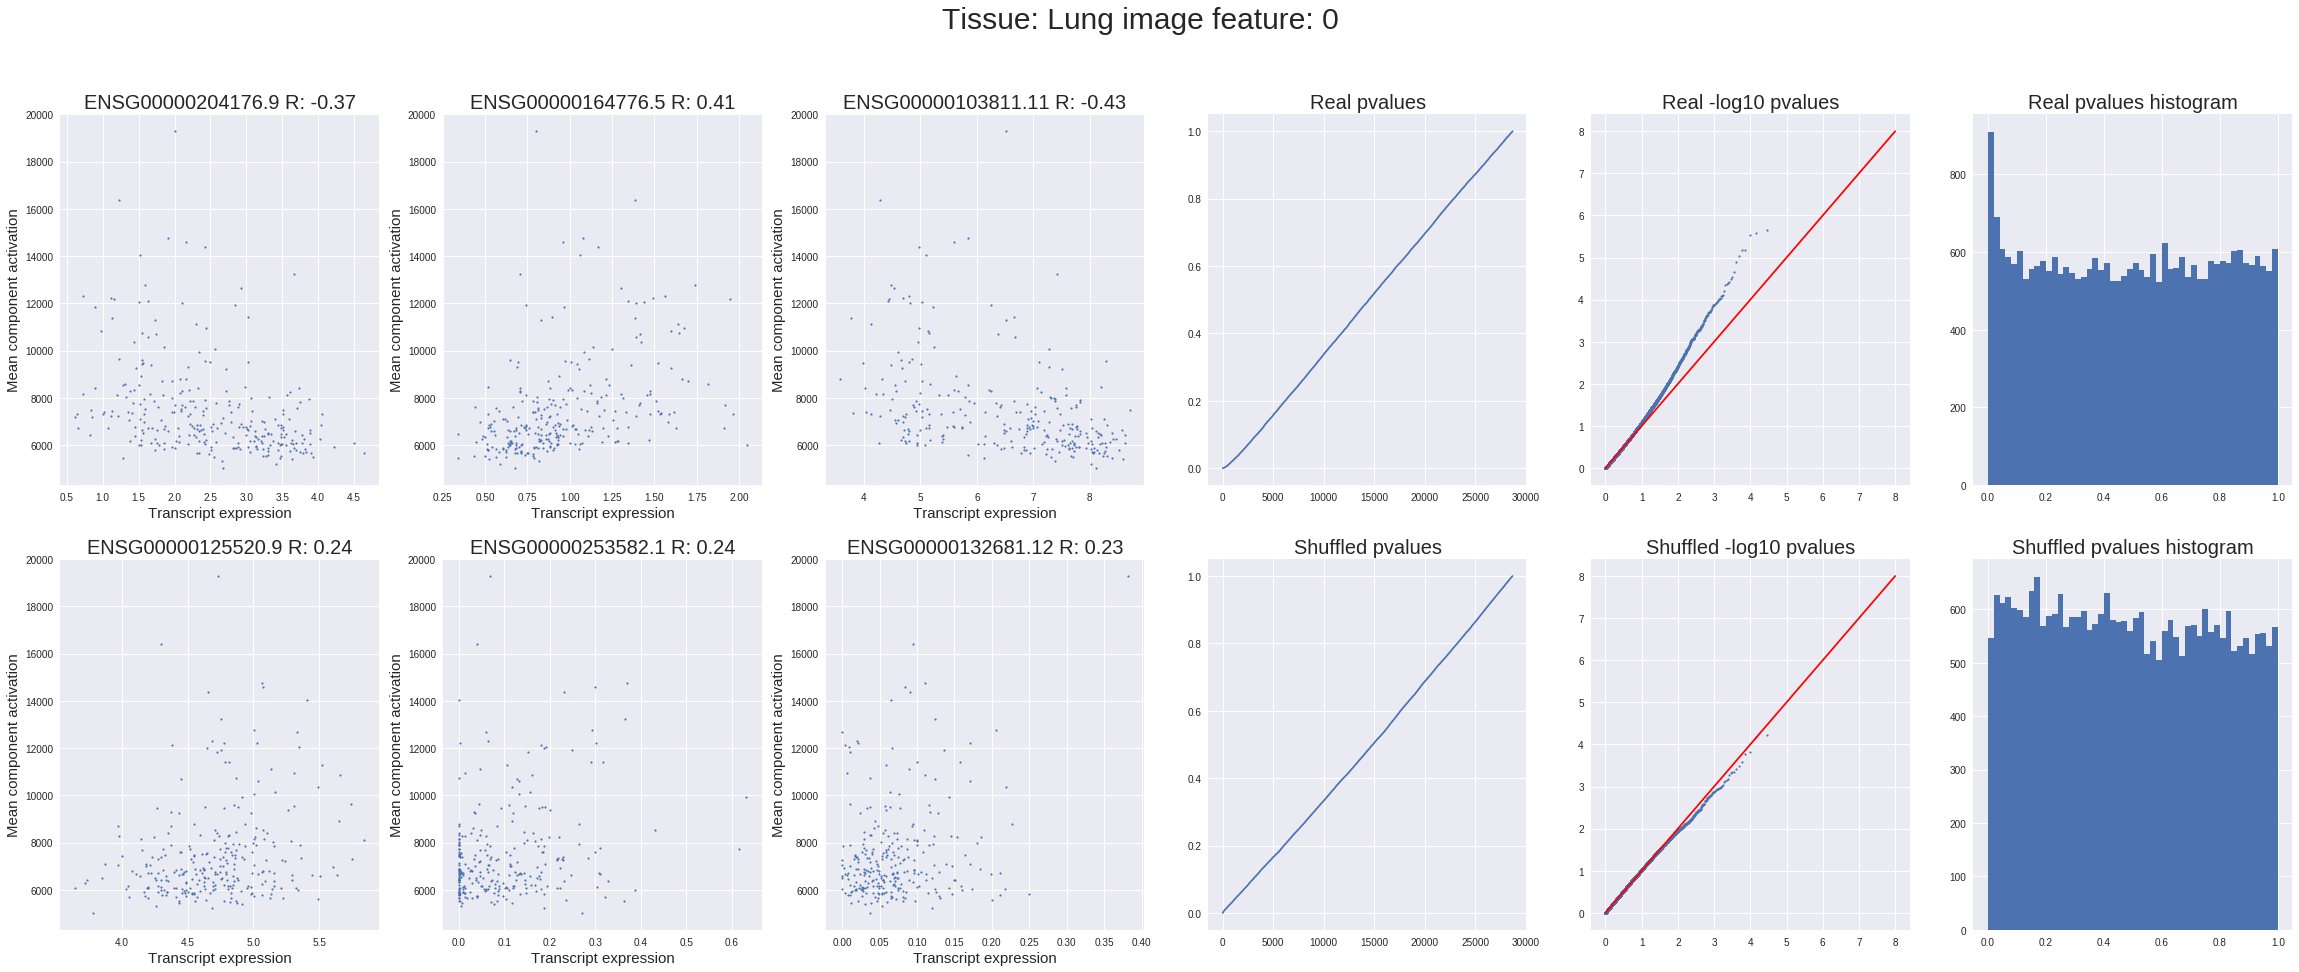

In [20]:


if tissue == 'Artery - Tibial':
    tissue_filename = 'Artery_Tibial'
elif tissue == 'Heart - Left Ventricle':
    tissue_filename = 'Heart_Left_Ventricle'
elif tissue == 'Breast - Mammary Tissue':
    tissue_filename = 'Breast_Mammary_Tissue'
elif tissue == 'Brain - Cerebellum':
    tissue_filename = 'Brain_Cerebellum'
else:
    tissue_filename = tissue

sorted_real_pvalues_idx = np.argsort(real_pvalues)
sorted_shuffled_pvalues_idx = np.argsort(shuffled_pvalues)

tissue_expression_filepath = '/nfs/research2/stegle/stegle_secure/GTEx/download/49139/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v6.p1.c1.GRU/ExpressionFiles/phe000006.v2.GTEx_RNAseq.expression-data-matrixfmt.c1/parse_data/44_tissues/GTEx_Data_20150112_RNAseq_RNASeQCv1.1.8_gene_rpkm_{}_normalised_without_inverse_gene_expression.txt'.format(tissue_filename)
with open(tissue_expression_filepath, 'r') as f:
    expression_table = np.array([x.split('\t') for x in f.read().splitlines()])

f,a = plt.subplots(2,6, figsize=(40,15))
f.suptitle("Tissue: {} image feature: {}".format(tissue, component), size=30)
titles = []
for i in range(3):
    a[0][i].scatter(X_matrix[:,sorted_real_pvalues_idx[i]], y_pheno[:,component], s=3)
    a[0][i].set_ylabel("Mean component activation", size=15)
    a[0][i].set_xlabel("Transcript expression", size=15)
    a[0][i].set_title("{} R: {:1.2f}".format(expression_table[1:,0][sorted_real_pvalues_idx[i]], pearsonr(X_matrix[:,sorted_real_pvalues_idx[i]], y_pheno[:,component])[0]),size=20)
    
for i in range(3):
    a[1][i].scatter(X_matrix[:,sorted_shuffled_pvalues_idx[i]], shuffled_y_pheno[:,component], s=3)
    a[1][i].set_ylabel("Mean component activation", size=15)
    a[1][i].set_xlabel("Transcript expression", size=15)
    a[1][i].set_title("{} R: {:1.2f}".format(expression_table[1:,0][sorted_shuffled_pvalues_idx[i]], pearsonr(X_matrix[:,sorted_shuffled_pvalues_idx[i]], shuffled_y_pheno[:,component])[0]), size=20)

sorted_real_indexes = np.argsort(real_pvalues)
sorted_real_pvalues = real_pvalues[sorted_real_indexes]
sorted_shuffled_indexes = np.argsort(shuffled_pvalues)
sorted_shuffled_pvalues = shuffled_pvalues[sorted_shuffled_indexes]


sample_real = sorted_real_pvalues
expected_real = np.linspace(1/len(sorted_real_pvalues), 1, len(sorted_real_pvalues))
sample_shuffle = sorted_shuffled_pvalues
expected_shuffle = np.linspace(1/len(sorted_shuffled_pvalues), 1, len(sorted_shuffled_pvalues))

a[0][3].plot(sample_real)
# a[3].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[0][3].set_title('Real pvalues', size=20)
a[1][3].plot(sample_shuffle)
# a[4].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[1][3].set_title('Shuffled pvalues', size=20)

a[0][4].scatter([-math.log(x,10) for x in expected_real], [-math.log(x,10) for x in sample_real], s=3)
a[0][4].plot(np.linspace(0,8,100), np.linspace(0,8,100), c='red')
a[0][4].set_title('Real -log10 pvalues', size=20)
a[1][4].scatter([-math.log(x, 10) for x in expected_shuffle], [-math.log(x,10) for x in sample_shuffle], s=3)
a[1][4].plot(np.linspace(0,8,100), np.linspace(0,8,100),c='red')
a[1][4].set_title('Shuffled -log10 pvalues', size=20)

a[0][5].hist(sample_real,bins=50)
a[0][5].set_title('Real pvalues histogram', size=20)
a[1][5].hist(sample_shuffle,bins=50)
a[1][5].set_title('Shuffled pvalues histogram', size=20)


os.makedirs(GTEx_directory + '/data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/graphs'.format(tissue),exist_ok=True)
# plt.savefig('../data/processed/association_results/expression/inception_50_-1.h5/small/{}/mean/graphs/component{}_sh1_fl0.png'.format(tissue,component))
print ()
plt.show()

# GO lookup of most associated genes

In [27]:
from pyensembl import EnsemblRelease
# release 77 uses human reference genome GRCh38
data = EnsemblRelease(77)

gene_ids = [expression_table[1:,0][sorted_real_indexes[i]].split('.')[0] for i in range(5)]

print ([data.gene_name_of_gene_id(x) for x in gene_ids])

['SYT15', 'PHKG1', 'CTSH', 'RP11-973H7.4', 'ZBTB42']


In [ ]:
from pyensembl import EnsemblRelease
# release 77 uses human reference genome GRCh38
data = EnsemblRelease(77)

for tissue in tissue_transcript_counter.keys():
    transcript_counts = list(tissue_transcript_counter[tissue].items())
    transcript_counts.sort(key=lambda x: x[1],reverse=True)
    print (tissue, [data.gene_name_of_gene_id(x[0].split('.')[0]) for x in transcript_counts[0:5]])

*Description:*

**Top row**. Plots ordered from left to right. Plots 1-3: Three scatter plots showing the transcripts with lowest three real pvalues. Plot 4: ordered plots of pvalues. Plot 5: -log 10 qq plot of real pvalues. Plot 6: Histogram of real pvalues.

**Bottom row**. Plots ordered from left to right. Plots 1-3: Three scatter plots showing the transcripts with lowest three shuffled pvalues. Plot 4: shuffled pvalues plotted in order. Plot 5: -log 10 qq plot of shuffled pvalues. Plot 6: Histogram of real pvalues.

*Points to note*

1. Comparing plot 5 on the top and bottom row. Notice for the real pvalues on the top row, we see a higher than expected number of -log 10 pvalues, shown by the blue dots above the red line. For the shuffled pvalues on the bottom line, we see close to the expected number of low p-values, shown by the blue dots closely following the red line.
2. Comparing plot 4 on the top and bottom row.